In [252]:
import pandas as pd

In [266]:
df = pd.read_csv("Downloads/HR_Details.csv")

In [268]:
df

,Sno,Candidate_Ref,DOJ_Extended,Duration_to_accept_offer,Notice_Period,Offered_Band,Percent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Joining_Bonus,...,Age,LOB_Id,Location,Region_ID,Region_Name,Domicile_ID,Domicile_Name,Date_of_Interview,Status,LOB
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,...,34.0,1,Noida,R1,North,D6,Goa,2013-01-08,Joined,ERS
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,...,34.0,2,Chennai,R2,South,D9,Himachal Pradesh,2013-01-12,Joined,INFRA
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,...,27.0,2,Noida,R1,North,D10,Jharkhand,2013-01-25,Joined,INFRA
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,...,34.0,2,Noida,R1,North,D3,Chandigarh,2013-01-27,Joined,INFRA
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,...,34.0,2,Noida,R1,North,D21,Tripura,2013-01-28,Joined,INFRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8990,12319,3822427,No,4,0,E1,191.67,191.67,0.00,No,...,34.0,1,Chennai,R2,South,D21,Tripura,2013-08-19,Joined,ERS
8991,12327,3828206,Yes,2,0,E1,150.00,150.00,0.00,No,...,34.0,4,Chennai,R2,South,D9,Himachal Pradesh,2013-08-20,Joined,BFSI
8992,12331,3834159,No,0,0,E2,35.42,35.42,0.00,No,...,34.0,2,Noida,R1,North,D18,Rajasthan,2013-08-20,Joined,INFRA
8993,12332,3835433,No,0,30,E1,76.92,53.85,-13.04,No,...,34.0,2,Noida,R1,North,D2,Bihar,2013-08-20,Joined,INFRA


In [270]:
missing_values = df.isnull().sum()
missing_values

Sno                              0
Candidate_Ref                    0
DOJ_Extended                     0
Duration_to_accept_offer         0
Notice_Period                    0
Offered_Band                    13
Percent_hike_expected_in_CTC     0
Percent_hike_offered_in_CTC      0
Percent_difference_CTC           0
Joining_Bonus                    0
Candidate_relocate_actual        0
Gender                           0
Candidate_Source                 0
Rex_in_Yrs                       0
Location_ID                      0
Postal_Code                      0
Age                             15
LOB_Id                           0
Location                        13
Region_ID                       13
Region_Name                     13
Domicile_ID                      0
Domicile_Name                    0
Date_of_Interview                0
Status                           0
LOB                              0
dtype: int64

Handle Numeric and Non-Numeric Columns Separately

In [273]:
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].apply(lambda col: col.fillna(col.median()), axis=0)
numeric_columns

Index(['Sno', 'Candidate_Ref', 'Duration_to_accept_offer', 'Notice_Period',
       'Percent_hike_expected_in_CTC', 'Percent_hike_offered_in_CTC',
       'Percent_difference_CTC', 'Rex_in_Yrs', 'Postal_Code', 'Age', 'LOB_Id'],
      dtype='object')

In [275]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
for column in non_numeric_columns:
    mode_value = df[column].mode()[0]  # Get the most frequent value (mode)
    df[column].fillna(mode_value, inplace=True)
non_numeric_columns

Index(['DOJ_Extended', 'Offered_Band', 'Joining_Bonus',
       'Candidate_relocate_actual', 'Gender', 'Candidate_Source',
       'Location_ID', 'Location', 'Region_ID', 'Region_Name', 'Domicile_ID',
       'Domicile_Name', 'Date_of_Interview', 'Status', 'LOB'],
      dtype='object')

In [277]:

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25) 
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)
    return df[filter]


# Apply the function to each group
cleaned_data = df.groupby('Offered_Band').apply(lambda x: remove_outliers(x, 'Percent_hike_expected_in_CTC'))
 

for column in numeric_columns:
    cleaned_data = remove_outliers(cleaned_data, column)

# Drop the additional index column added by groupby
cleaned_data.reset_index(drop=True, inplace=True)


In [279]:
missing_values = df.isnull().sum()
missing_values

Sno                             0
Candidate_Ref                   0
DOJ_Extended                    0
Duration_to_accept_offer        0
Notice_Period                   0
Offered_Band                    0
Percent_hike_expected_in_CTC    0
Percent_hike_offered_in_CTC     0
Percent_difference_CTC          0
Joining_Bonus                   0
Candidate_relocate_actual       0
Gender                          0
Candidate_Source                0
Rex_in_Yrs                      0
Location_ID                     0
Postal_Code                     0
Age                             0
LOB_Id                          0
Location                        0
Region_ID                       0
Region_Name                     0
Domicile_ID                     0
Domicile_Name                   0
Date_of_Interview               0
Status                          0
LOB                             0
dtype: int64

In [281]:
# Remove duplicates
df.drop_duplicates(inplace=True)


In [283]:
df

,Sno,Candidate_Ref,DOJ_Extended,Duration_to_accept_offer,Notice_Period,Offered_Band,Percent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Joining_Bonus,...,Age,LOB_Id,Location,Region_ID,Region_Name,Domicile_ID,Domicile_Name,Date_of_Interview,Status,LOB
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,...,34.0,1,Noida,R1,North,D6,Goa,2013-01-08,Joined,ERS
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,...,34.0,2,Chennai,R2,South,D9,Himachal Pradesh,2013-01-12,Joined,INFRA
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,...,27.0,2,Noida,R1,North,D10,Jharkhand,2013-01-25,Joined,INFRA
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,...,34.0,2,Noida,R1,North,D3,Chandigarh,2013-01-27,Joined,INFRA
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,...,34.0,2,Noida,R1,North,D21,Tripura,2013-01-28,Joined,INFRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8990,12319,3822427,No,4,0,E1,191.67,191.67,0.00,No,...,34.0,1,Chennai,R2,South,D21,Tripura,2013-08-19,Joined,ERS
8991,12327,3828206,Yes,2,0,E1,150.00,150.00,0.00,No,...,34.0,4,Chennai,R2,South,D9,Himachal Pradesh,2013-08-20,Joined,BFSI
8992,12331,3834159,No,0,0,E2,35.42,35.42,0.00,No,...,34.0,2,Noida,R1,North,D18,Rajasthan,2013-08-20,Joined,INFRA
8993,12332,3835433,No,0,30,E1,76.92,53.85,-13.04,No,...,34.0,2,Noida,R1,North,D2,Bihar,2013-08-20,Joined,INFRA


In [285]:
print("\nDataFrame After Cleaning:\n", df)


DataFrame After Cleaning:
         Sno  Candidate_Ref DOJ_Extended  Duration_to_accept_offer  \
0         1        2110407          Yes                        14   
1         2        2112635           No                        18   
2         3        2112838           No                         3   
3         4        2115021           No                        26   
4         5        2115125          Yes                         1   
...     ...            ...          ...                       ...   
8990  12319        3822427           No                         4   
8991  12327        3828206          Yes                         2   
8992  12331        3834159           No                         0   
8993  12332        3835433           No                         0   
8994  12333        3836076           No                         2   

      Notice_Period Offered_Band  Percent_hike_expected_in_CTC  \
0                30           E2                        -20.79   
1          

In [287]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\wesly\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


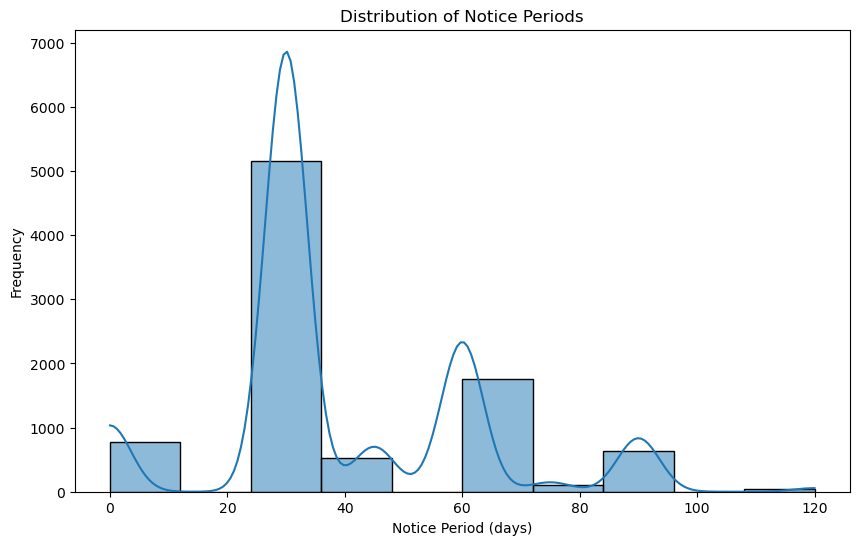

In [289]:
# Visualization 1: Distribution of Notice Periods
plt.figure(figsize=(10, 6))
sns.histplot(df['Notice_Period'], bins=10, kde=True)
plt.title('Distribution of Notice Periods')
plt.xlabel('Notice Period (days)')
plt.ylabel('Frequency')
plt.show()

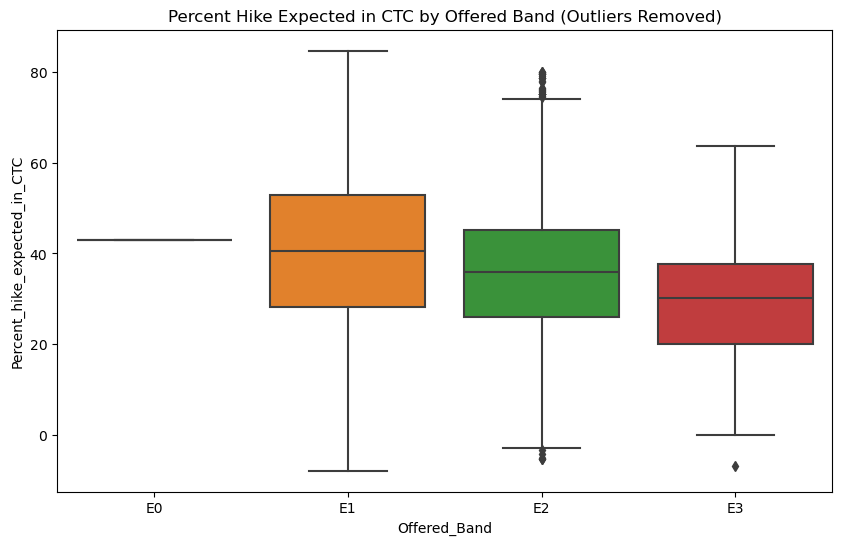

In [291]:
# Visualization 2: Percent Hike in CTC
plt.figure(figsize=(10, 6))
sns.boxplot(x='Offered_Band', y='Percent_hike_expected_in_CTC', data=cleaned_data)
plt.title('Percent Hike Expected in CTC by Offered Band (Outliers Removed)')
plt.show()

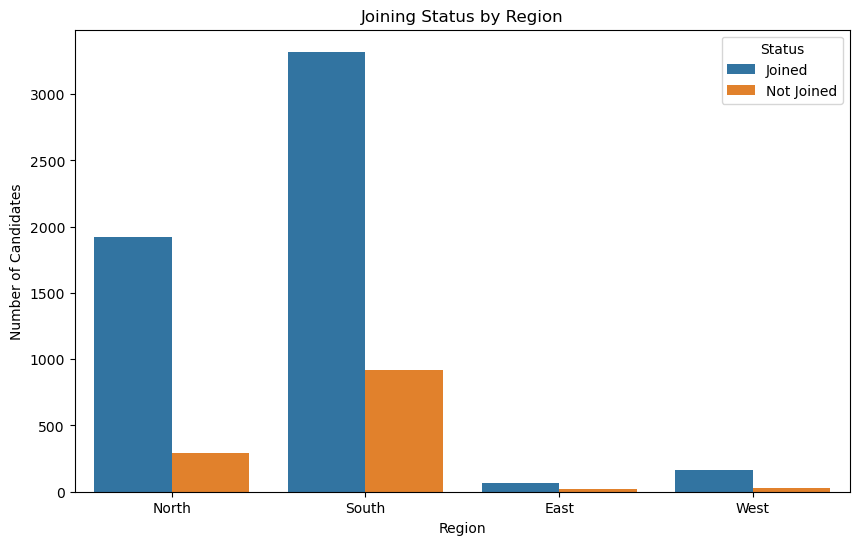

In [89]:
# Visualization 3: Joining Status by Region
plt.figure(figsize=(10, 6))
sns.countplot(x='Region_Name', hue='Status', data=df)
plt.title('Joining Status by Region')
plt.xlabel('Region')
plt.ylabel('Number of Candidates')
plt.show()

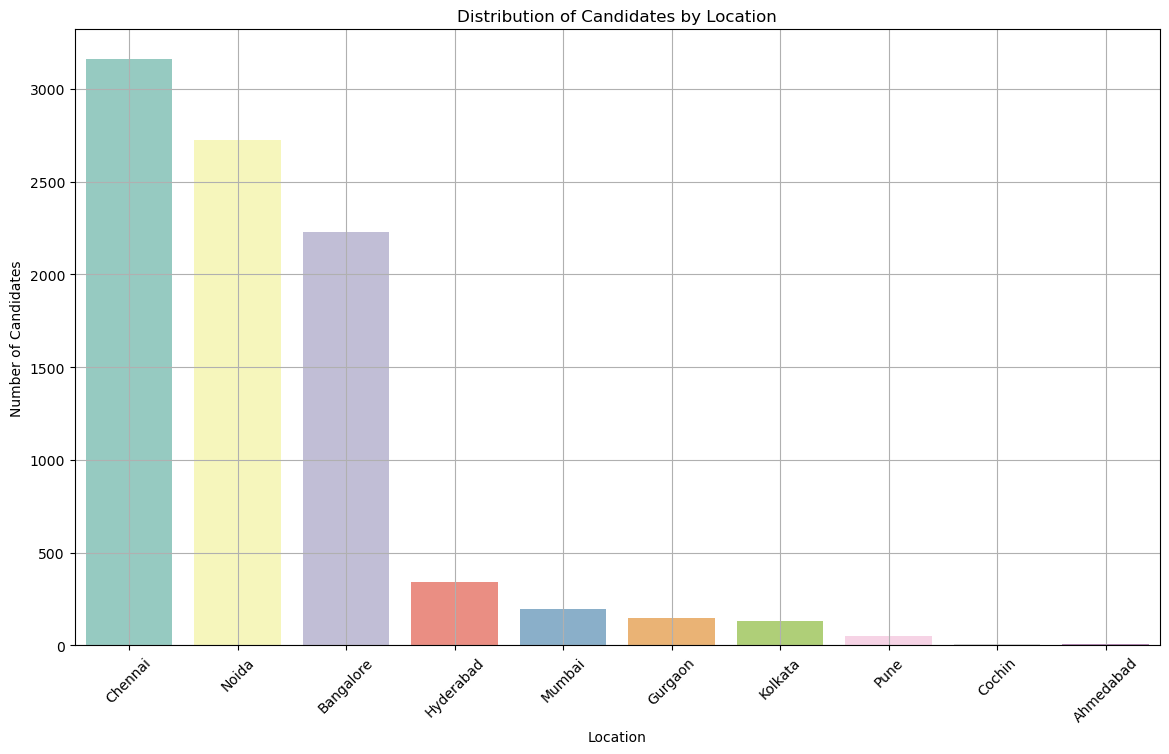

In [172]:
# Bar Plot for Distribution of Candidates by Location
plt.figure(figsize=(14, 8))
location_counts = df['Location'].value_counts()
sns.barplot(x=location_counts.index, y=location_counts.values, palette='Set3')
plt.title('Distribution of Candidates by Location')
plt.xlabel('Location')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

C:\wesly\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


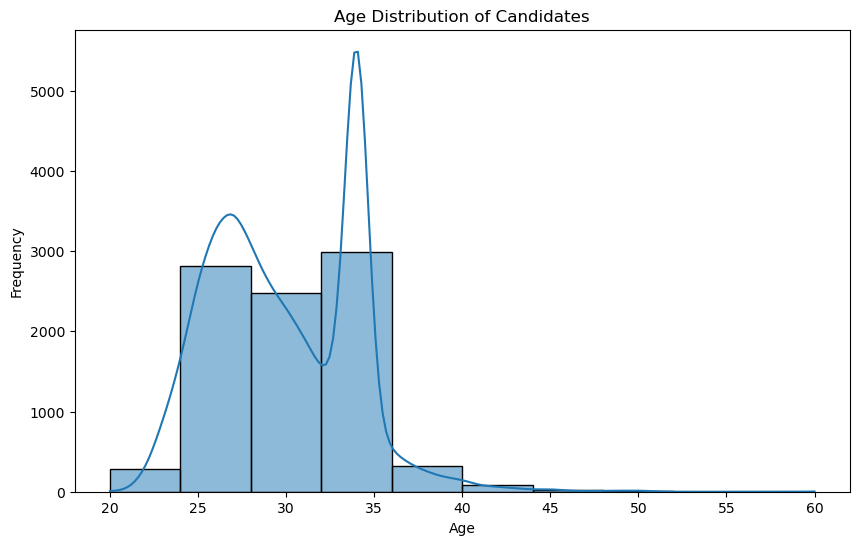

In [174]:
# Visualization 5: Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution of Candidates')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

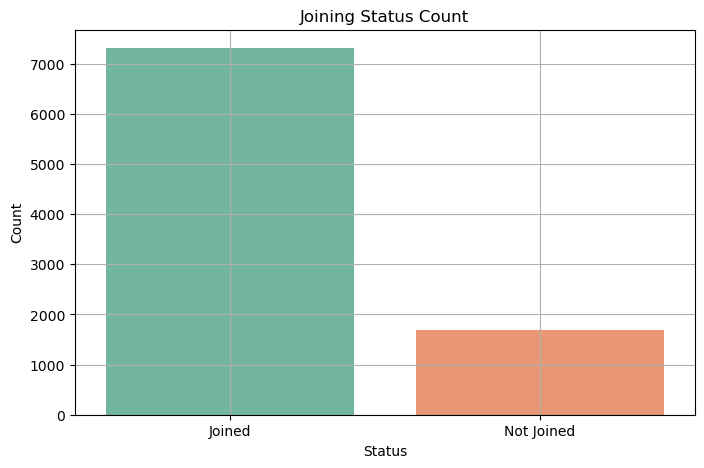

In [176]:
# Count Plot for Joining Status
plt.figure(figsize=(8, 5))
sns.countplot(x='Status', data=df, palette='Set2')
plt.title('Joining Status Count')
plt.xlabel('Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()